# Spotify song recommendation engine 


### We have access to a comprehensive dataset from Spotify that includes various features of tracks such as popularity, danceability, energy, and more. Our goal is to perform an in-depth analysis of this dataset to uncover insights into music trends and listener preferences.


## Dataset Information:
- Size: 19.1 MB
- Source: Kaggle
- Features: track_id, 
artist, 
album_na, e
track_n, me
popula, ity
durati, n_ms
ex, licit
dance, bility
energy

## Objective:
Our task is to analyze the Spotify tracks dataset to achieve the following objectives:
1. Determine the factors that contribute to a track's popularity.
2. Identify trends in music characteristics over time.
3. Create visualizations to showcase our findings.
4. Develop a simple recommendation system based on track features.


## Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings 
warnings.simplefilter("ignore")

## Import Data


In [2]:
df = pd.read_csv("spotify_tracks_dataset.csv")

## Prepare data

In [3]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df.shape

(114000, 21)

In [8]:
df.isnull()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Length: 114000, dtype: bool

In [11]:
most_popular_artist = df.sort_values(by='popularity', ascending = False).iloc[:10]
most_popular_artist

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
68303,68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
88410,88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


In [12]:
most_energy = df.sort_values(by = "energy", ascending = False).iloc[:10]
most_energy

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
101524,101524,5pFQTJ8yLS5Y6FFQPxEIVB,Nature Sounds,Water Sounds,Mountain Streams Alps,37,310500,False,0.1610,1.0,...,-14.559,1,0.0576,0.8550,0.780000,0.9790,0.00001,130.708,5,sleep
58391,58391,1PHKSxXvoHniClE3aUzx34,Amduscia,Existe,Impulso Biomecanico,25,332626,True,0.5660,1.0,...,-7.472,0,0.0701,0.1310,0.029500,0.0782,0.22400,138.016,4,industrial
101946,101946,2ay3BKEbIWexKL9mfqZqJi,White Noise Research,White Noise for Baby: Soothing Sounds for Newb...,A Big Old Downpour,32,598331,False,0.1680,1.0,...,-17.693,1,0.0523,0.9940,0.699000,0.9630,0.00001,123.451,3,sleep
25937,25937,4jZc8KZEuMjwdDx08QhMgD,Willi Herren,Lobet den Herren,Da sprach der alte Häuptling der Indianer,30,151173,False,0.6930,1.0,...,-0.108,1,0.0574,0.0477,0.000004,0.3100,0.93300,137.960,4,disco
101929,101929,47fr4oobqlxGemQFmVjrLm,Thunder Storm,Rain and Thunder Sleep,Rain and Thunder,32,142473,False,0.1650,1.0,...,-14.135,0,0.0524,0.0936,0.984000,0.9200,0.00001,81.293,4,sleep
101149,101149,3QzDWiSTwb3X2KiikhCoRp,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,Consistent Sounds of Mother Nature (From the S...,48,241266,False,0.0861,1.0,...,-18.799,1,0.0558,0.7960,0.990000,0.9800,0.00001,86.214,5,sleep
101245,101245,2ESzAmNt36FuiIeIGsPoBU,Rain Sounds,Loopable Rain Sounds for Sleeping,Gentle Rain Sounds,46,104567,False,0.1540,1.0,...,-27.417,0,0.0345,0.9850,0.586000,0.9160,0.00001,98.834,3,sleep
101246,101246,58CcvO9cDf6ulggV7CylFD,Rain Sounds;Nature Recordings;Rain Sounds & Wh...,2017 Relaxing Sleep and Rain Sounds for Insomn...,"White Noise Rain(Loopable,No fade)",48,149243,False,0.2090,1.0,...,-14.085,0,0.0684,0.1160,0.731000,0.6360,0.00001,84.715,4,sleep
101924,101924,3rrjUgwa9DdhpSwLQu7r4Y,Rain for Sleep,Binaural Rainfall,Clear Rain,32,144030,False,0.1510,1.0,...,-13.875,1,0.0584,0.1140,0.999000,0.4790,0.00001,135.861,3,sleep
101895,101895,2aDSdvpj4DdGjoUZODCFq1,Meeresrauschen,Meeresrauschen ohne Musik - Naturgeräusche zur...,Meeresrauschen ohne Musik,32,150764,False,0.1450,1.0,...,-14.666,0,0.0496,0.5260,0.971000,0.9560,0.00001,81.388,4,sleep


In [13]:
genre_count = df["track_genre"].value_counts()
print("Number of tracks in each genre: ")
print (genre_count)

Number of tracks in each genre: 
track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


## Data Visualization

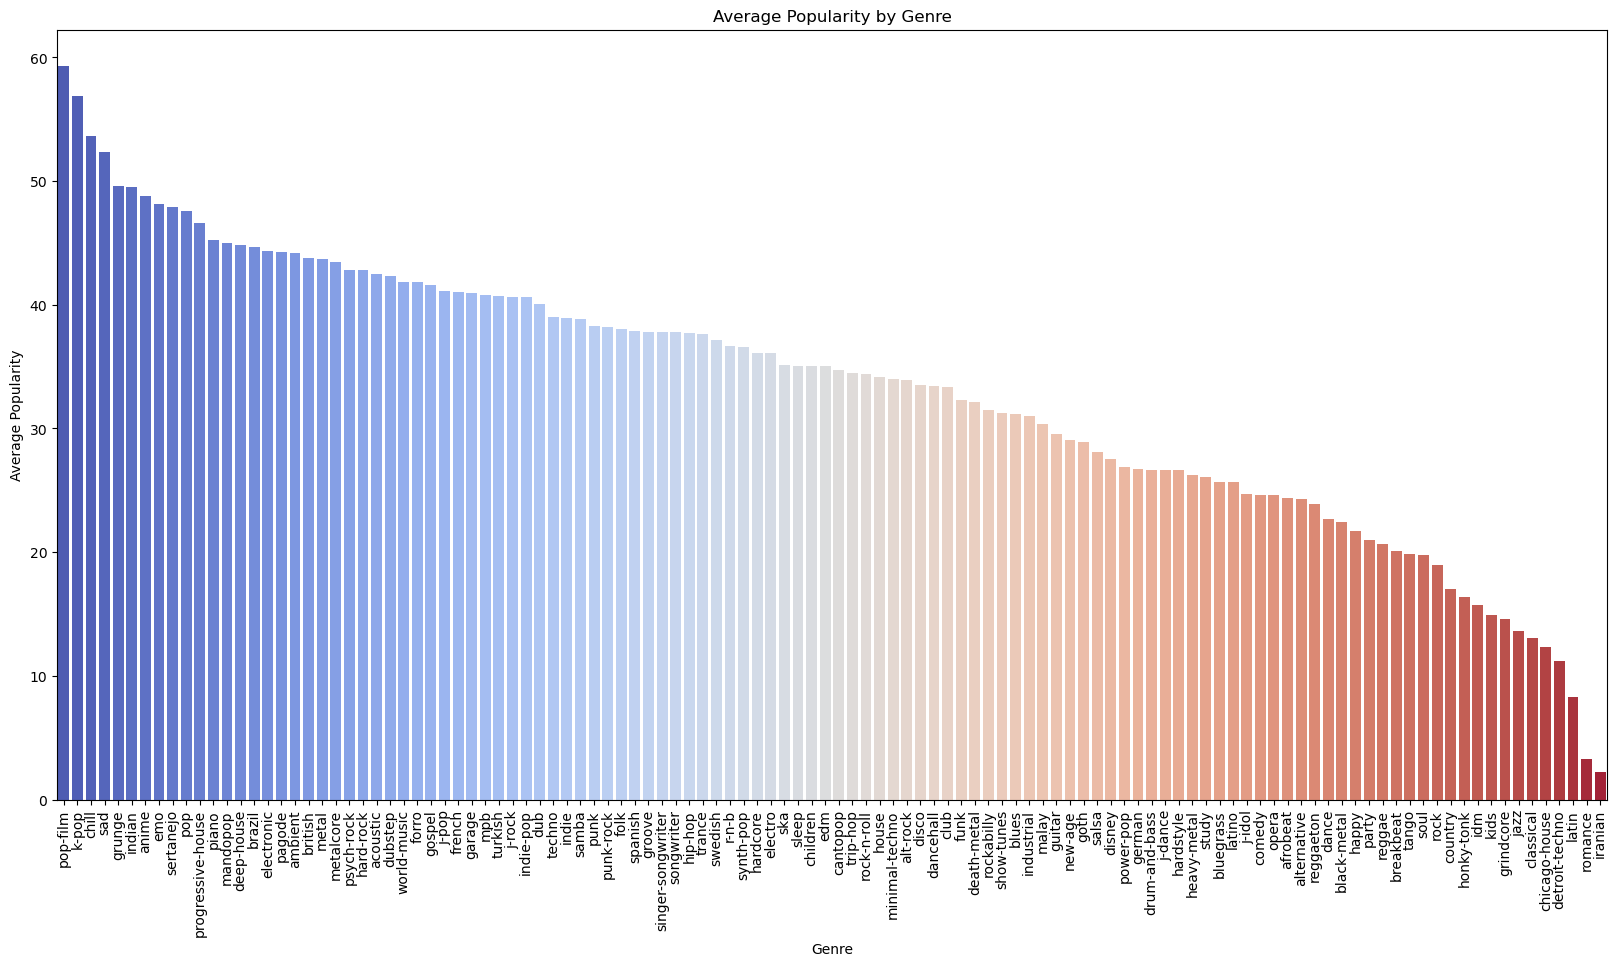

In [14]:
avg_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending = False)
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='coolwarm')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

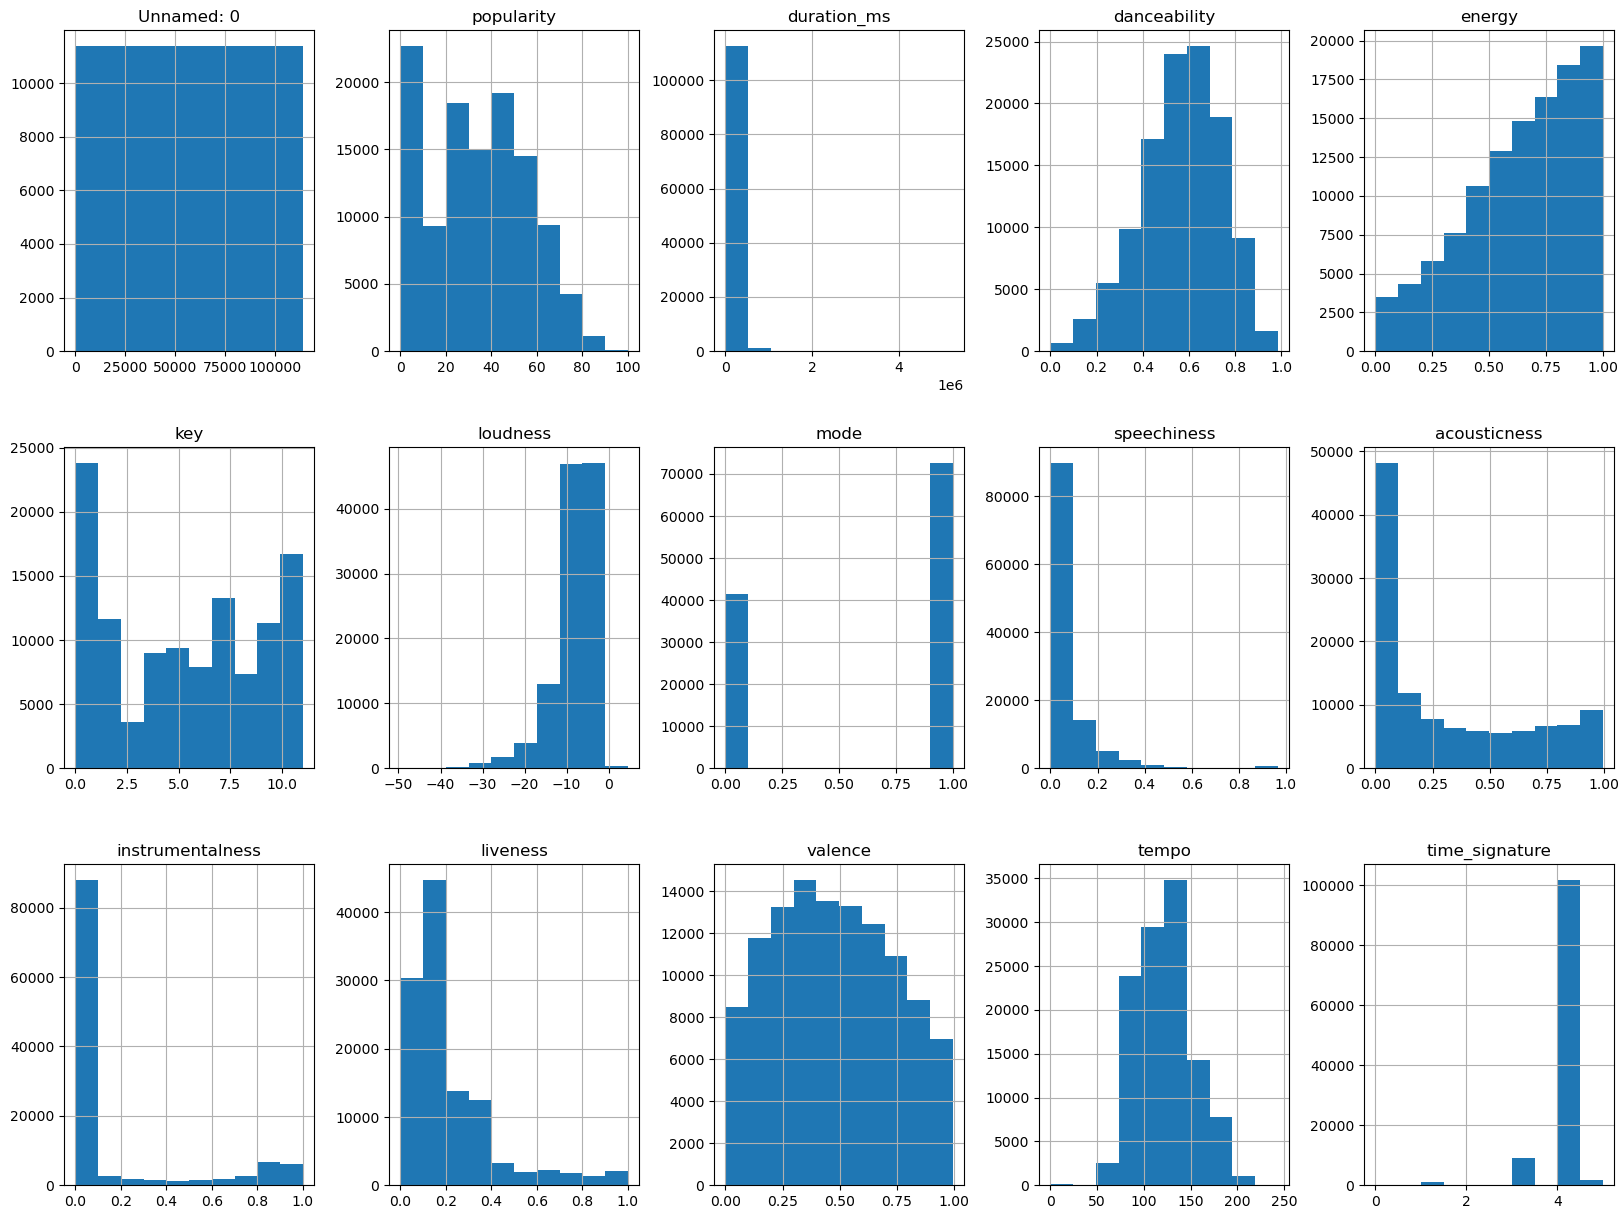

In [15]:
df.hist(layout=(3, 5), figsize=(20, 15))
plt.show()

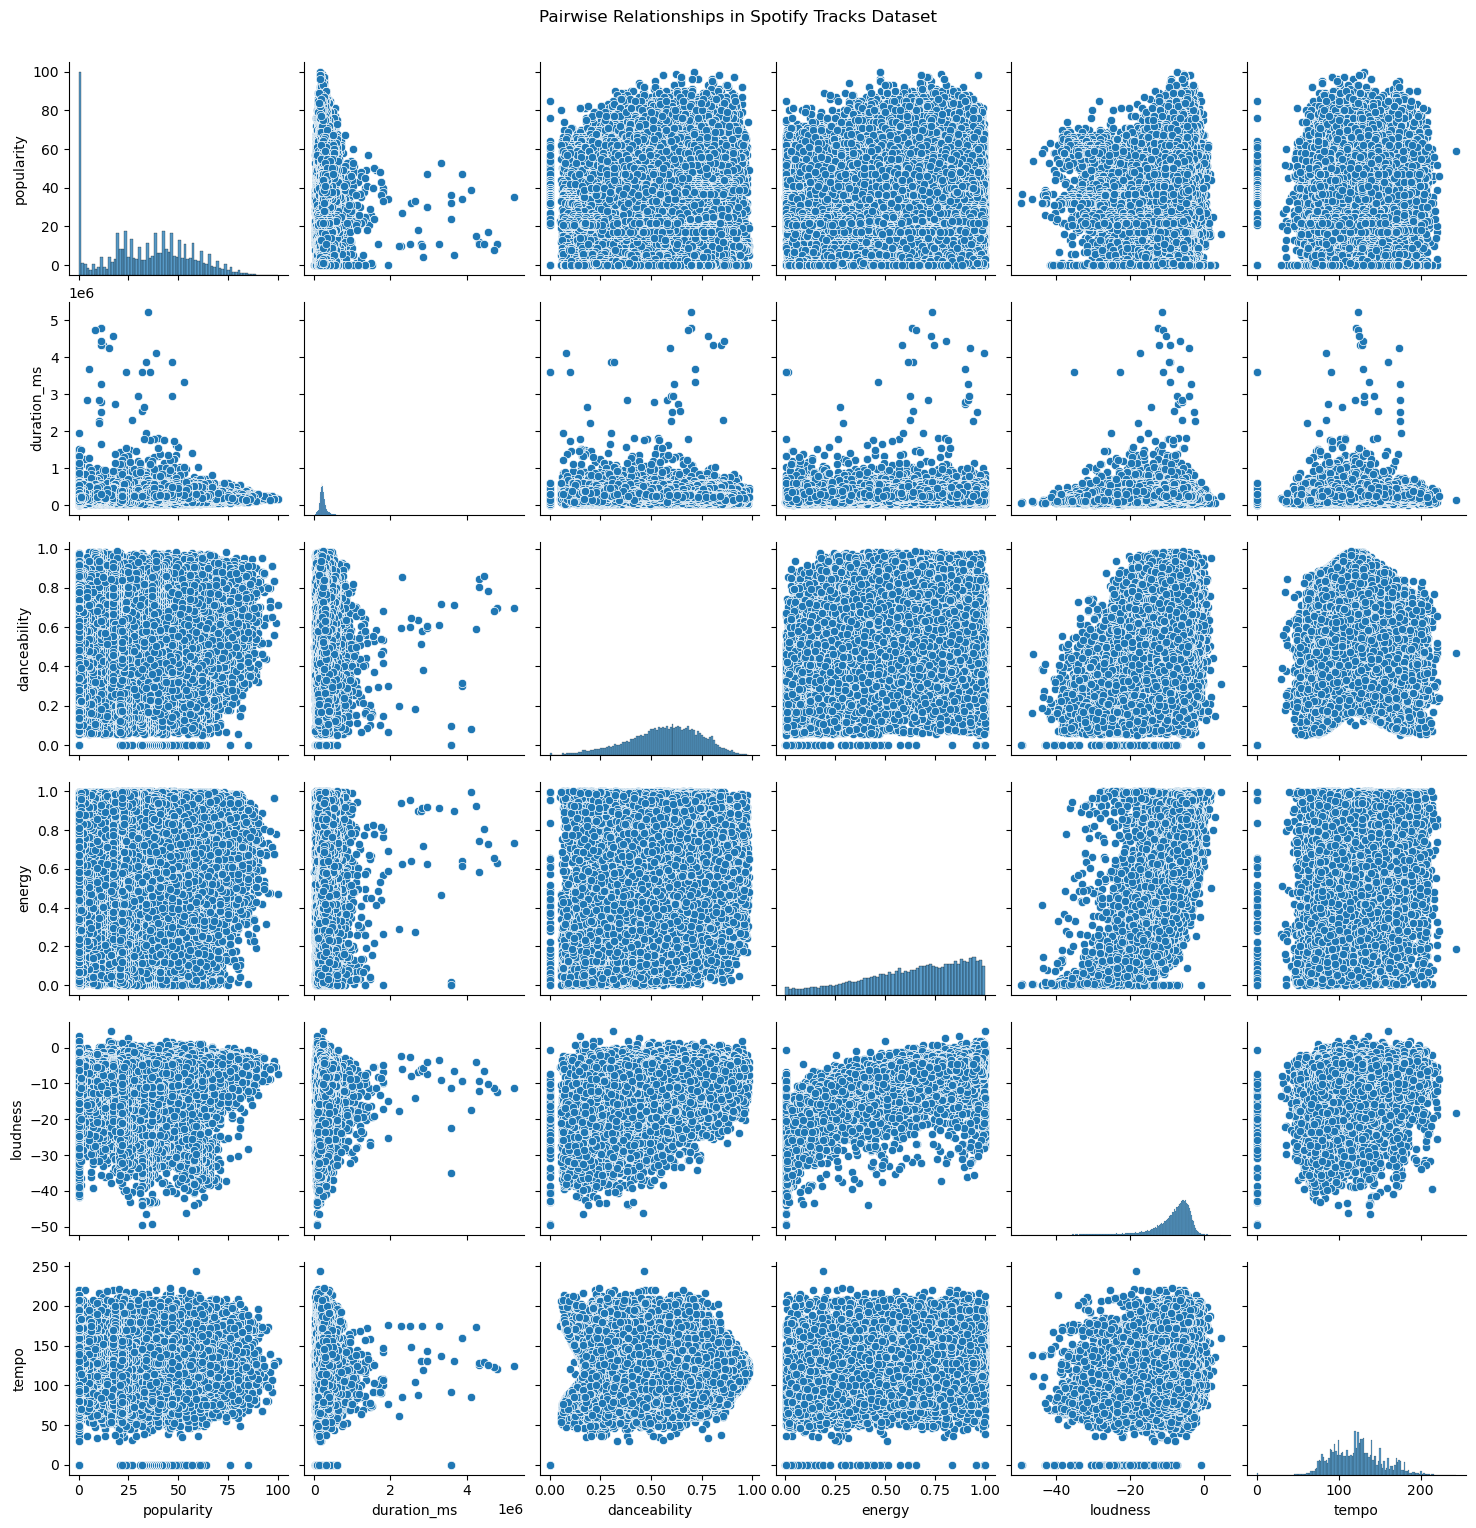

In [16]:

numeric_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'tempo']

# Creating pair plot
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairwise Relationships in Spotify Tracks Dataset', y=1.02)
plt.show()

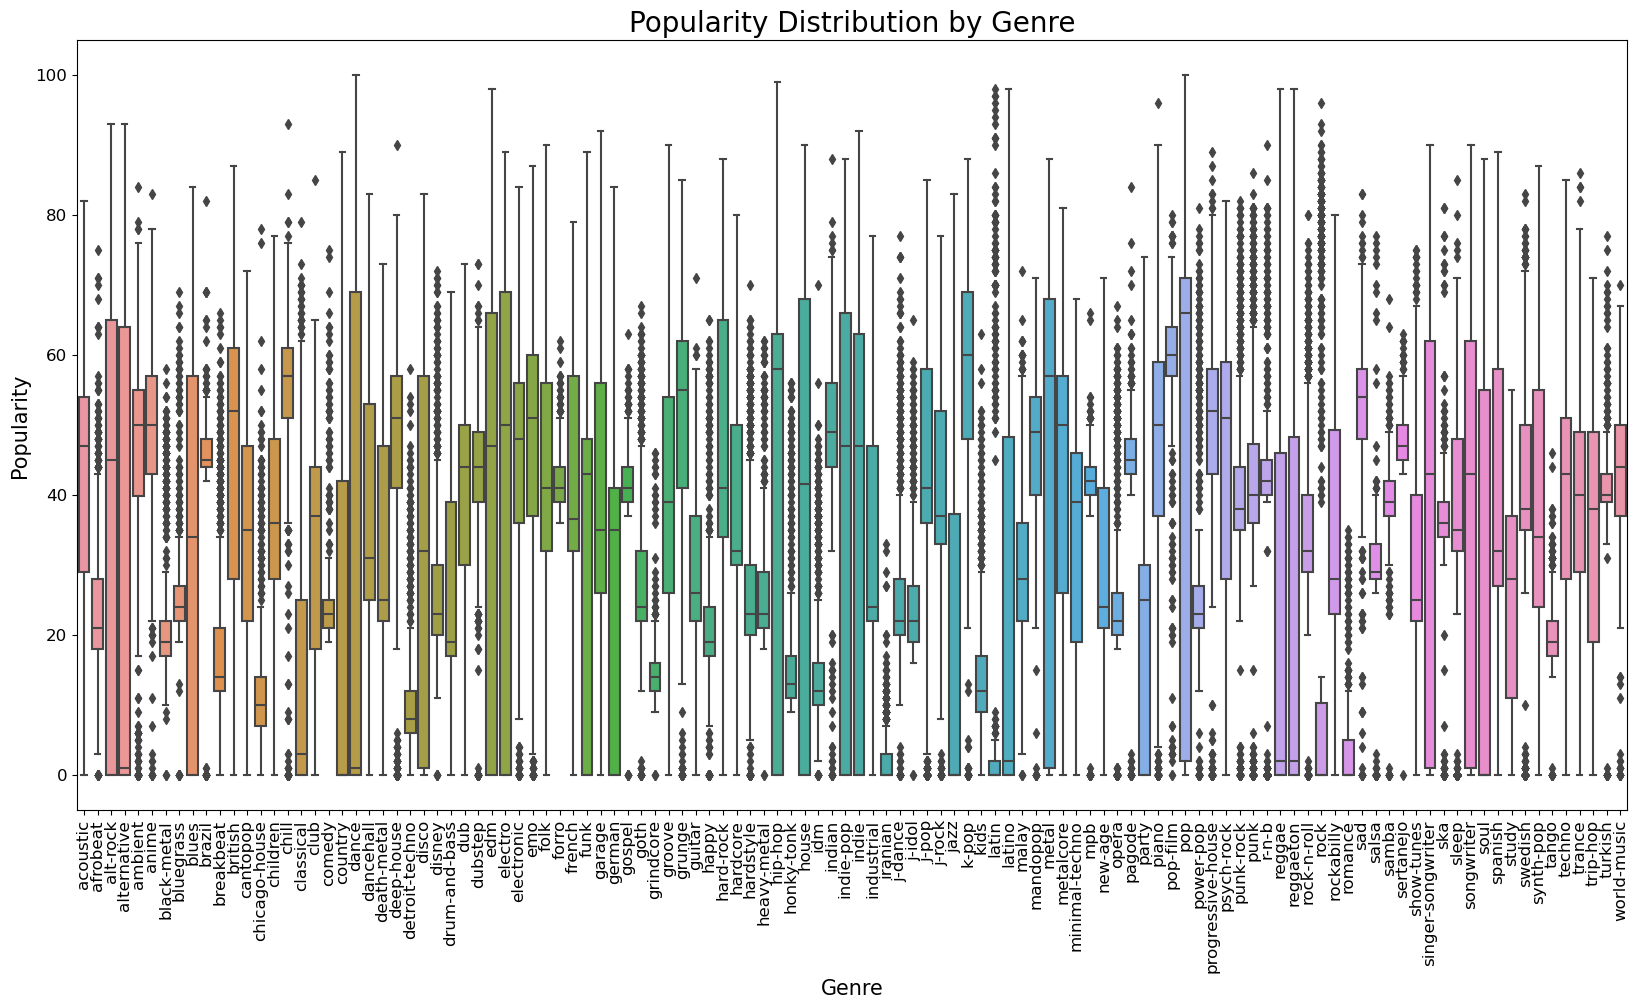

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x="track_genre", y = "popularity", data = df) 
plt.title('Popularity Distribution by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<Figure size 1800x800 with 0 Axes>

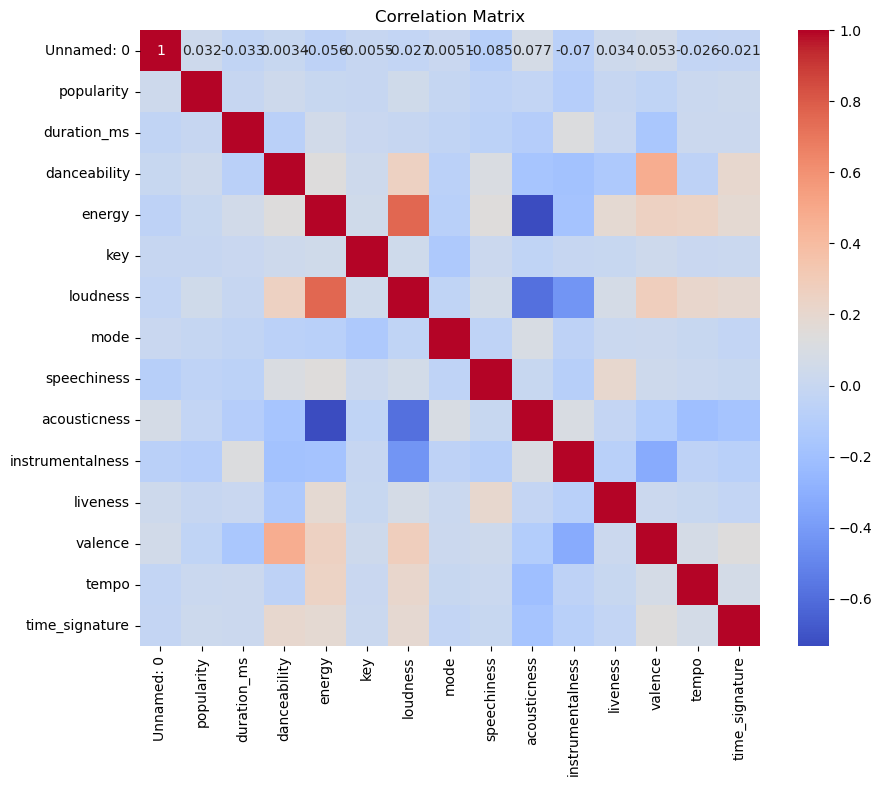

In [18]:
plt.figure(figsize=(18, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [47]:
# Create a count matrix for genres
from sklearn.neighbors import NearestNeighbors
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
count_matrix = count_vectorizer.fit_transform(df['track_genre'])

# Fit NearestNeighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(count_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [48]:
def get_recommendations(title):
    if title not in df['track_name'].values:
        return []

    # Getting the index of the song that matches the track_name
    idx = df[df['track_name'] == title].index[0]

    # Finding the nearest neighbors
    distances, indices = nn_model.kneighbors(count_matrix[idx], n_neighbors=11)

    # Get the song indices, skipping the first one as it will be the same song
    song_indices = indices.flatten()[1:]

    # Return the top 10 most similar songs
    return df['track_name'].iloc[song_indices].tolist()

## Testing the model

In [53]:
Song_name = "I'm Good (Blue)"
recommendations = get_recommendations(Song_name)
print(f"Recommendations for {Song_name}:")
print(recommendations)

Recommendations for I'm Good (Blue):
['For My Hand', 'The Days', 'The Nights', 'Without You', "Heaven's Gate", 'Wake Me Up - Radio Edit', 'Onyeka (Baby) (Mixed)', 'SOS', 'Wake Me Up - Radio Edit', 'Heaven']


## Conclusion

In this project, we developed a Song Recommendation System using genre similarity based on cosine similarity. The system allows users to input a song name and receive a list of recommended songs that share similar genres. Here’s a summary of how the system works and what it offers:

- **Data Preparation**: We utilized a dataset containing song information, including genre tags and cover images.
- **Feature Extraction**: Using CountVectorizer, we transformed genre tags into a format suitable for cosine similarity calculation.
- **Similarity Calculation**: Cosine similarity was employed to measure the similarity between songs based on their genre tags.
- **Recommendation Engine**: The system retrieves and displays the top 10 songs most similar to the user-inputt.images.
- **User Interface**: Implemented with Streamlit, the app provides an intuitive interface where users can easily input a song name and get instant recommendations.

### Future Enhancements

- **Integration with User Preferences**: Incorporating user preferences such as mood or tempo to personalize recommendations.
- **Real-Time Updates**: Implementing mechanisms to update song recommendations dynamically based on new data or user feedback.
- **Enhanced Visualization**: Improving the visual presentation of recommendations, potentially adding more metadata and interactive features.

### Applications

This system can be beneficial in various scenarios, including music streaming platforms, personalized playlist generation, and discovering new music based on genre preferences. It demonstrates the application of machine learning techniques to enhance user experience and engagement in music discovery.

Overall, the Song Recommendation System leverages machine learning and interactive visualization through Streamlit, offering a practical tool for music enthusiasts to explore and discover music based on genre similarity.
